### Data Sourcing
Obtain the data from 1 Oct 2012 to 30 September 2022 for the following: (say)
2012-10-01 to 2022-09-30
1. SPY (SPDR S & P 500 ETF)
2. XLE (Energy Sector SPDR)
3. VNQ (Real Estate)
4. XLF (Finance Sector SPDR)

In [54]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

import matplotlib.pyplot as plt
import numpy as np
import plotly as plotly
from scipy.stats import lognorm,shapiro,normaltest,norm
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [55]:
yahoo_financials = YahooFinancials('SPY')
data = yahoo_financials.get_historical_price_data(start_date='2012-10-01', 
                                                  end_date='2022-09-30', 
                                                  time_interval='weekly')
spy_df = pd.DataFrame(data['SPY']['prices'])
spy_df = spy_df.drop('date', axis=1).set_index('formatted_date')
spy_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2012-10-01,147.160004,143.830002,144.520004,146.139999,619770200,120.519814
2012-10-08,146.119995,142.580002,145.600006,142.889999,599319200,117.839592
2012-10-15,146.520004,142.770004,143.229996,143.389999,679092400,118.251907
2012-10-22,143.669998,140.389999,143.149994,141.350006,718295200,116.569550
2012-10-29,143.720001,140.679993,141.850006,141.559998,342136300,116.742744


In [56]:
yahoo_financials = YahooFinancials('XLE')
data = yahoo_financials.get_historical_price_data(start_date='2012-10-01', 
                                                  end_date='2022-09-30', 
                                                  time_interval='weekly')
xle_df = pd.DataFrame(data['XLE']['prices'])
xle_df = xle_df.drop('date', axis=1).set_index('formatted_date')
xle_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2012-10-01,74.529999,72.669998,73.940002,73.580002,57754800,50.376884
2012-10-08,74.379997,72.040001,73.169998,72.559998,49958700,49.678547
2012-10-15,75.190002,71.910004,72.430000,73.830002,60294000,50.548054
2012-10-22,74.099998,71.019997,73.860001,71.959999,57769500,49.267742
2012-10-29,72.690002,70.820000,72.250000,71.059998,31881500,48.651546


In [57]:
yahoo_financials = YahooFinancials('XLF')
data = yahoo_financials.get_historical_price_data(start_date='2012-10-01', 
                                                  end_date='2022-09-30', 
                                                  time_interval='weekly')
xlf_df = pd.DataFrame(data['XLF']['prices'])
xlf_df = xlf_df.drop('date', axis=1).set_index('formatted_date')
xlf_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2012-10-01,13.184403,12.688871,12.753859,13.046304,360107630,10.720537
2012-10-08,13.103168,12.802600,12.981316,12.843217,370064697,10.553654
2012-10-15,13.314379,12.835093,12.891958,13.086921,372740399,10.753914
2012-10-22,13.119415,12.745735,13.070674,12.835093,408311252,10.546980
2012-10-29,13.160032,12.826970,12.883834,12.997563,191163467,10.680485


In [58]:
yahoo_financials = YahooFinancials('VNQ')
data = yahoo_financials.get_historical_price_data(start_date='2012-10-01', 
                                                  end_date='2022-09-30', 
                                                  time_interval='weekly')
vnq_df = pd.DataFrame(data['VNQ']['prices'])
vnq_df = vnq_df.drop('date', axis=1).set_index('formatted_date')
vnq_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2012-10-01,65.680000,63.820000,65.099998,65.169998,14488300,43.299465
2012-10-08,65.529999,64.680000,64.830002,64.769997,9381600,43.033691
2012-10-15,66.320000,64.459999,64.790001,65.540001,11433000,43.545292
2012-10-22,65.550003,63.400002,65.489998,63.759998,9668400,42.362644
2012-10-29,65.570000,63.740002,64.040001,65.120003,7515200,43.266239


In [59]:
combined_prices_df = pd.DataFrame(columns=['SPY','VNQ','XLE','XLF'])
combined_prices_df['SPY'] = spy_df['adjclose']
combined_prices_df['VNQ'] = vnq_df['adjclose']
combined_prices_df['XLE'] = xle_df['adjclose']
combined_prices_df['XLF'] = xlf_df['adjclose']
combined_prices_df.head()

,SPY,VNQ,XLE,XLF
formatted_date,,,,
2012-10-01,120.519814,43.299465,50.376884,10.720537
2012-10-08,117.839592,43.033691,49.678547,10.553654
2012-10-15,118.251907,43.545292,50.548054,10.753914
2012-10-22,116.569550,42.362644,49.267742,10.546980
2012-10-29,116.742744,43.266239,48.651546,10.680485


<AxesSubplot:xlabel='formatted_date'>

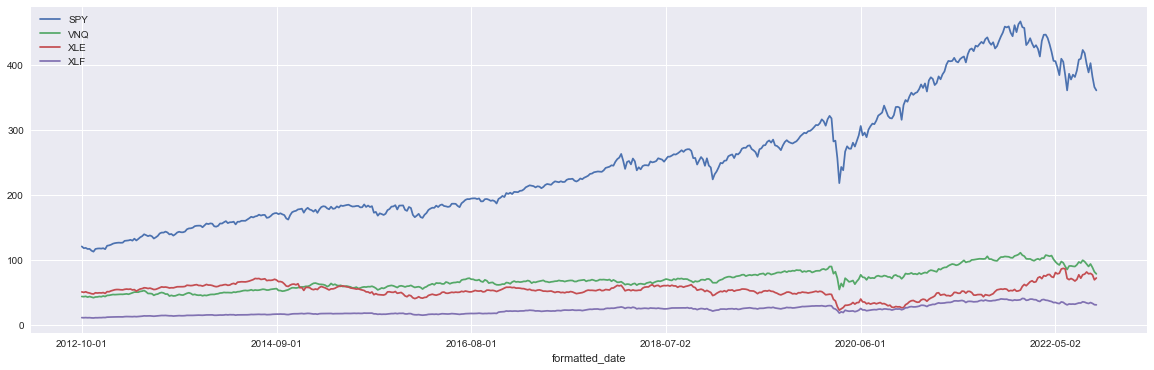

In [60]:
combined_prices_df.plot(kind='line', figsize=(20,6))

In [61]:
combined_rets_df = pd.DataFrame(columns=['SPY','VNQ','XLE','XLF'])
combined_rets_df['SPY'] = spy_df['adjclose'].pct_change()
combined_rets_df['VNQ'] = vnq_df['adjclose'].pct_change()
combined_rets_df['XLE'] = xle_df['adjclose'].pct_change()
combined_rets_df['XLF'] = xlf_df['adjclose'].pct_change()
combined_rets_df.head()

,SPY,VNQ,XLE,XLF
formatted_date,,,,
2012-10-01,NaN,NaN,NaN,NaN
2012-10-08,-0.022239,-0.006138,-0.013862,-0.015567
2012-10-15,0.003499,0.011888,0.017503,0.018975
2012-10-22,-0.014227,-0.027159,-0.025329,-0.019243
2012-10-29,0.001486,0.021330,-0.012507,0.012658


<AxesSubplot:xlabel='formatted_date'>

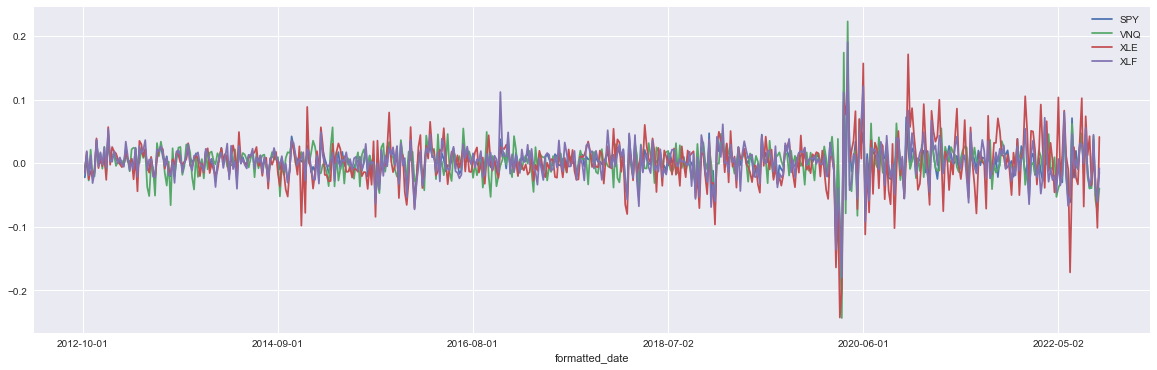

In [62]:
combined_rets_df.plot(kind='line', figsize=(20,6))

In [63]:
rec_count=20000
combined_log_rets_df = pd.DataFrame(columns=['SPY','VNQ','XLE','XLF'])
combined_log_rets_df['SPY'] = np.log(spy_df['adjclose'])-np.log(spy_df['adjclose'].shift(1))
combined_log_rets_df['VNQ'] = np.log(vnq_df['adjclose'])-np.log(vnq_df['adjclose'].shift(1))
combined_log_rets_df['XLE'] = np.log(xle_df['adjclose'])-np.log(xle_df['adjclose'].shift(1))
combined_log_rets_df['XLF'] = np.log(xlf_df['adjclose'])-np.log(xlf_df['adjclose'].shift(1))
combined_log_rets_df.head()

,SPY,VNQ,XLE,XLF
formatted_date,,,,
2012-10-01,NaN,NaN,NaN,NaN
2012-10-08,-0.022490,-0.006157,-0.013959,-0.015689
2012-10-15,0.003493,0.011818,0.017351,0.018798
2012-10-22,-0.014329,-0.027535,-0.025655,-0.019430
2012-10-29,0.001485,0.021106,-0.012586,0.012579


<AxesSubplot:xlabel='formatted_date'>

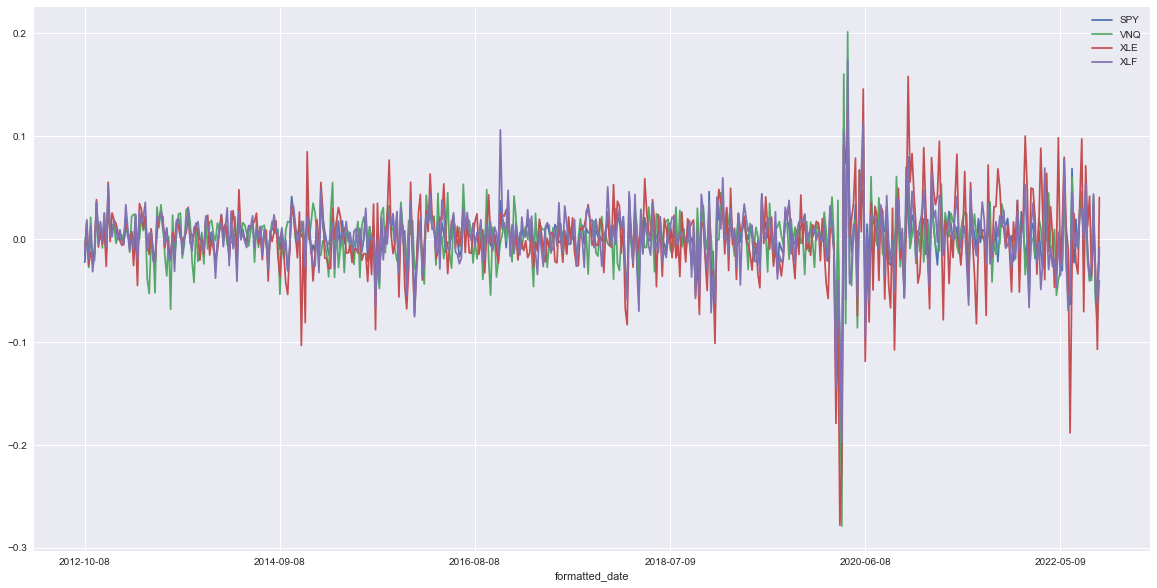

In [64]:
combined_log_rets_df.dropna(inplace = True),
combined_log_rets_df=combined_log_rets_df[-rec_count:]
combined_log_rets_df.plot(kind='line', figsize=(20,10))

### Test for normality

Text(0.5, 0, 'StdDev')

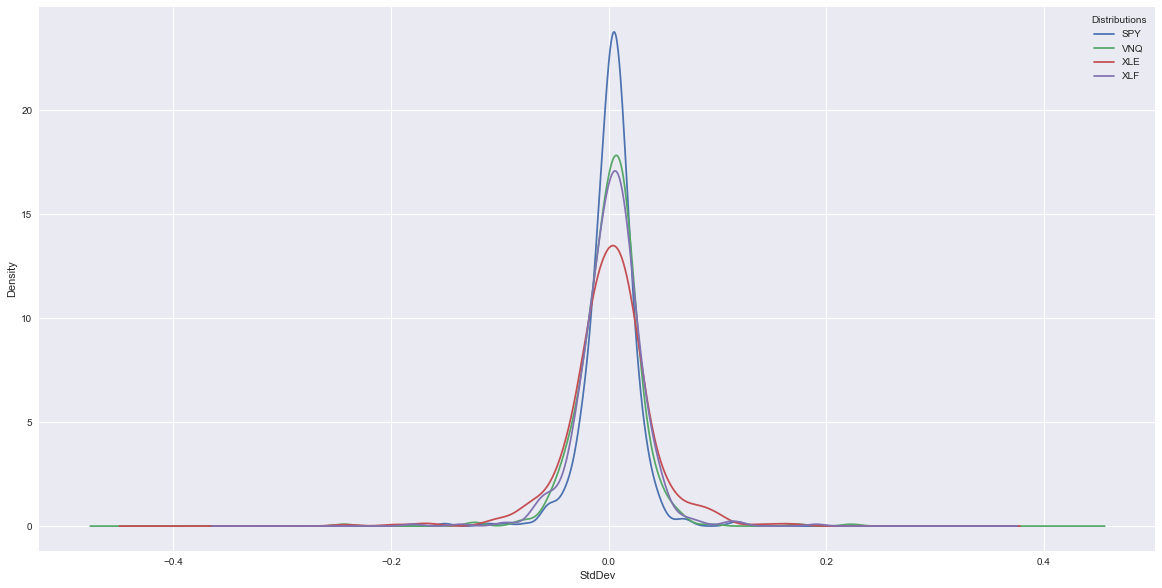

In [65]:
#plot distribution of points by team 
combined_rets_df.plot(kind='kde', figsize=(20,10))

#add legend
plt.legend(['SPY','VNQ','XLE','XLF'], title='Distributions')

#add x-axis label
plt.xlabel('StdDev')

#### QQ Plot

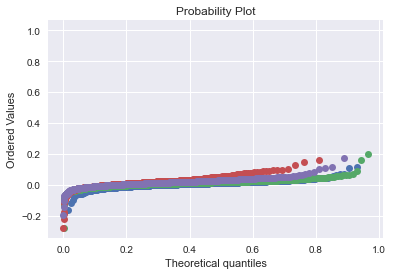

In [66]:
import scipy.stats as stats

plt.style.use('seaborn')

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
stats.probplot(combined_log_rets_df['SPY'], dist=stats.beta, sparams=(2,3), plot=plt, fit=False)
stats.probplot(combined_log_rets_df['VNQ'], dist=stats.beta, sparams=(1,2), plot=plt, fit=False)
stats.probplot(combined_log_rets_df['XLE'], dist=stats.beta, sparams=(1,4), plot=plt, fit=False)
stats.probplot(combined_log_rets_df['XLF'], dist=stats.beta, sparams=(1,3), plot=plt, fit=False)

# Remove the regression lines
ax.get_lines()[1].remove()
ax.get_lines()[2].remove()
ax.get_lines()[3].remove()
ax.get_lines()[4].remove()

# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('C0')
ax.get_lines()[1].set_markerfacecolor('C1')
ax.get_lines()[2].set_markerfacecolor('C2')
ax.get_lines()[3].set_markerfacecolor('C3')

# Add on y=x line
ax.plot([0, 0], [1, 1], c='C4')

In [67]:
# Normal QQ Plot for Returns
'''
stock_symbol = 'SPY'
qq = sm.qqplot(combined_rets_df['SPY'],norm, fit=True, line="q")
qq.set_size_inches((7, 5))
plt.title(f"Normal QQ Plot for {stock_symbol} Return")
plt.show()
'''

'\nstock_symbol = \'SPY\'\nqq = sm.qqplot(combined_rets_df[\'SPY\'],norm, fit=True, line="q")\nqq.set_size_inches((7, 5))\nplt.title(f"Normal QQ Plot for {stock_symbol} Return")\nplt.show()\n'

#### Stationarity - ADF test

In [68]:
import statsmodels.tsa.stattools as st

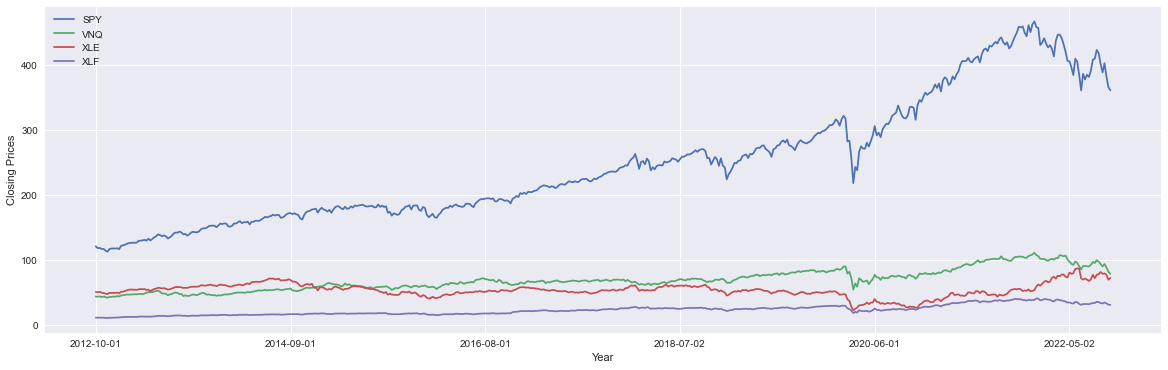

In [69]:
combined_prices_df.plot(kind='line', figsize=(20,6))
plt.ylabel("Closing Prices")
plt.xlabel("Year")
plt.show()

In [70]:
combined_adf_df = pd.DataFrame(columns=['SPY','VNQ','XLE','XLF'])
combined_adf_df['SPY'] = st.adfuller(x=spy_df['adjclose'], autolag="AIC") #regression="ct", maxlag=12)
combined_adf_df['VNQ'] = st.adfuller(x=vnq_df['adjclose'], autolag="AIC") #regression="ct", maxlag=12)
combined_adf_df['XLE'] = st.adfuller(x=xle_df['adjclose'], autolag="AIC") #regression="ct", maxlag=12)
combined_adf_df['XLF'] = st.adfuller(x=xlf_df['adjclose'], autolag="AIC") #regression="ct", maxlag=12)
print("spy adf:", combined_adf_df['SPY'][0], "adf_pvalue:", combined_adf_df['SPY'][1])
print("vnq adf:", combined_adf_df['VNQ'][0], "adf_pvalue:", combined_adf_df['VNQ'][1])
print("xle adf:", combined_adf_df['XLE'][0], "adf_pvalue:", combined_adf_df['XLE'][1])
print("xlf adf:", combined_adf_df['XLF'][0], "adf_pvalue:", combined_adf_df['XLF'][1])

spy adf: -0.9166456282503938 adf_pvalue: 0.7824413613894599
vnq adf: -1.7413039617668584 adf_pvalue: 0.4099668219364751
xle adf: -1.545754293664303 adf_pvalue: 0.5107682793693421
xlf adf: -1.3794397691308045 adf_pvalue: 0.5920923025404967


In [71]:
# Here p-value is far bigger than 0.005, so we can't reject null hypothesis, and can be concluded its not stationary.

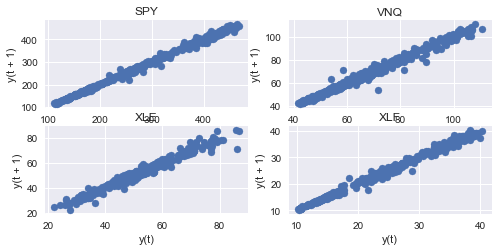

In [72]:
#import seaborn as sns
#c1 = sns.color_palette("YlOrRd_r", 4)
plt.subplot(321, title='SPY')
pd.plotting.lag_plot(combined_prices_df['SPY'], lag=1)

plt.subplot(322, title='VNQ')
pd.plotting.lag_plot(combined_prices_df['VNQ'], lag=1)

plt.subplot(323, title='XLE')
pd.plotting.lag_plot(combined_prices_df['XLE'], lag=1)

plt.subplot(324, title='XLF')
pd.plotting.lag_plot(combined_prices_df['XLF'], lag=1)

plt.show()

# Correlation is calculated between the variable 
# and itself at previous time steps, such a correlation is called Autocorrelation.

In [ ]:
# As we can see from the above tests and QQ plot the returns are not normally distributed. 
# Any analysis assuming the normal distribution of the data will not be applicable to these returns.

#### Regime shift tests

In [76]:
from statsmodels.tsa.stattools import adfuller
print("SPY: \n", adfuller(combined_rets_df['SPY'].dropna()))
print("VNQ: \n", adfuller(combined_rets_df['VNQ'].dropna()))
print("XLE: \n", adfuller(combined_rets_df['XLE'].dropna()))
print("XLF: \n", adfuller(combined_rets_df['XLF'].dropna()))

SPY: 
 (-24.708634916885842, 0.0, 0, 520, {'1%': -3.4429882202506255, '5%': -2.8671142122781066, '10%': -2.569738849852071}, -2363.499332355958)
VNQ: 
 (-8.610525418481956, 6.494491633719613e-14, 7, 513, {'1%': -3.443161545965353, '5%': -2.8671904981615706, '10%': -2.5697795041589244}, -2102.6222151119464)
XLE: 
 (-8.207531313442107, 6.959364527737657e-13, 10, 510, {'1%': -3.4432372923913124, '5%': -2.86722383510113, '10%': -2.5697972702806613}, -1824.5249321092128)
XLF: 
 (-14.234703031785426, 1.5745610043202773e-26, 2, 518, {'1%': -3.443037261465839, '5%': -2.8671357972350493, '10%': -2.569750352856994}, -2099.051831165468)


#### Markov Switching Autoregressive Model

In [77]:
mod_kns = sm.tsa.MarkovRegression(combined_rets_df['SPY'].dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                    SPY   No. Observations:                  521
Model:               MarkovRegression   Log Likelihood                1333.388
Date:                Wed, 08 Mar 2023   AIC                          -2648.776
Time:                        21:06:22   BIC                          -2610.474
Sample:                    10-08-2012   HQIC                         -2633.773
                         - 09-26-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   2.02e-05      8.946      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0008      0.000      7.299      0.000       0.001       0.001
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0086      0.005      1.886      0.059      -0.000       0.018
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9779      0.011     93.130      0.000       0.957       0.998
p[1->0]        0.0438        nan        nan        nan         nan         nan
p[2->0]     1.398e-13        nan        nan        nan         nan         nan
p[0->1]        0.0189      0.010      1.883      0.060      -0.001       0.039
p[1->1]        0.9562        nan        nan        nan         nan         nan
p[2->1]        0.1366      0.127      1.078      0.281      -0.112       0.385
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

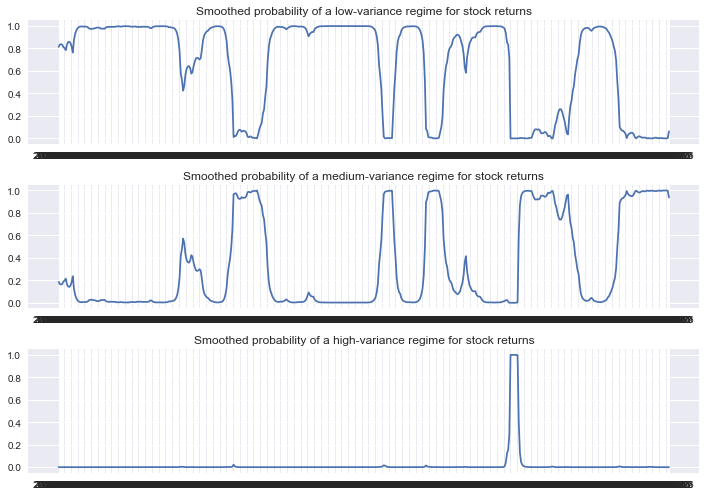

In [78]:
fig, axes = plt.subplots(3, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()

In [79]:
mod_kns = sm.tsa.MarkovRegression(combined_rets_df['VNQ'].dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                    VNQ   No. Observations:                  521
Model:               MarkovRegression   Log Likelihood                1219.928
Date:                Wed, 08 Mar 2023   AIC                          -2421.855
Time:                        21:09:25   BIC                          -2383.553
Sample:                    10-08-2012   HQIC                         -2406.852
                         - 09-26-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   2.95e-05     13.893      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0016      0.000      4.632      0.000       0.001       0.002
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0214      0.012      1.829      0.067      -0.002       0.044
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9949      0.004    270.204      0.000       0.988       1.002
p[1->0]        0.0283        nan        nan        nan         nan         nan
p[2->0]     1.333e-15        nan        nan        nan         nan         nan
p[0->1]        0.0028      0.003      0.923      0.356      -0.003       0.009
p[1->1]        0.9717        nan        nan        nan         nan         nan
p[2->1]        0.1316      0.126      1.049      0.294      -0.114       0.378
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

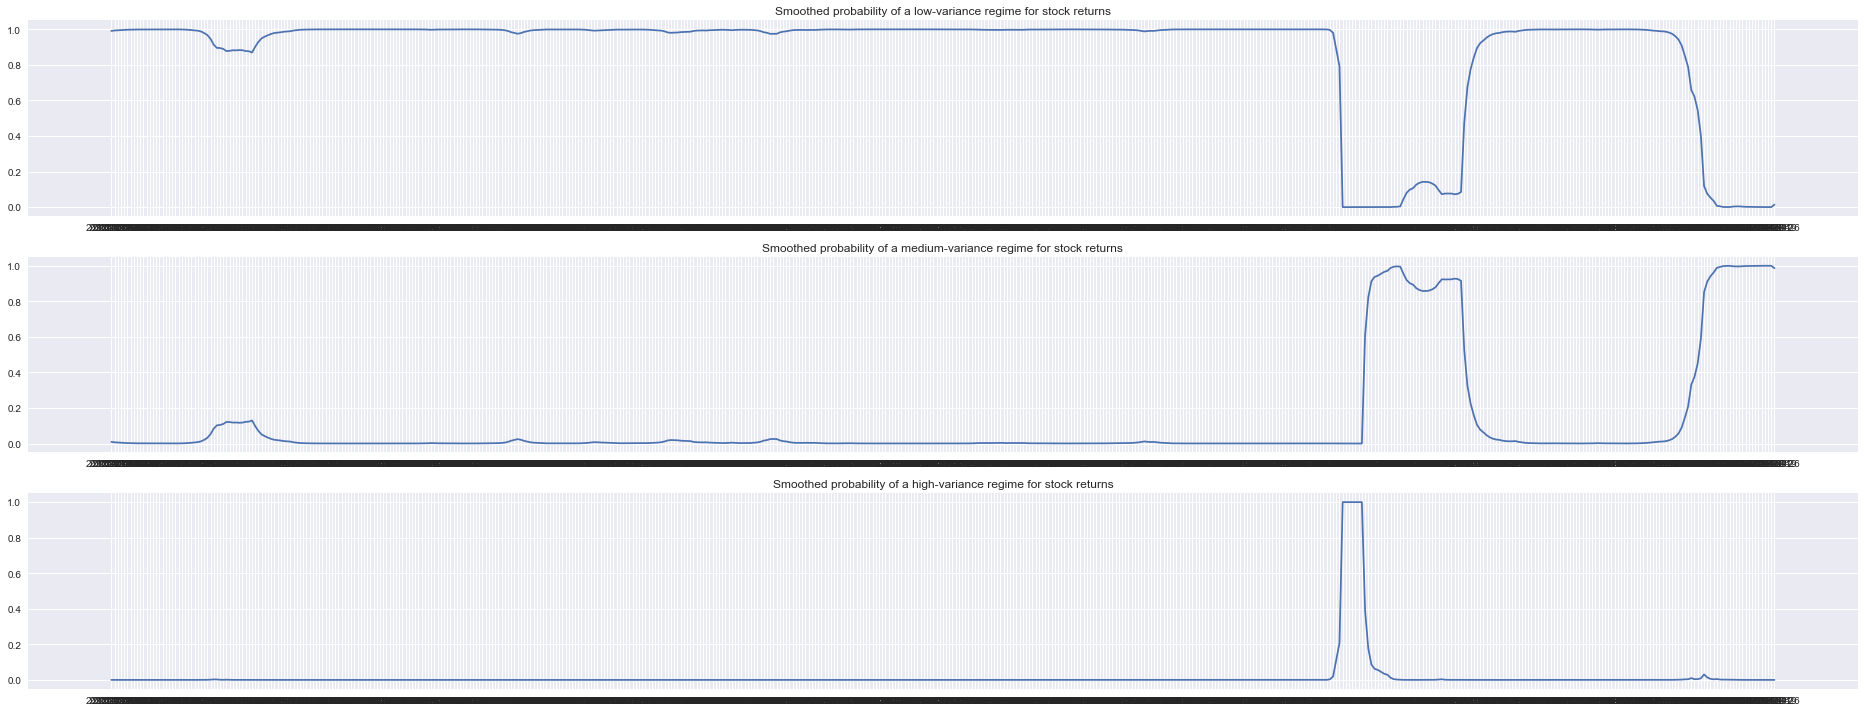

In [82]:
fig, axes = plt.subplots(3, figsize=(26,10))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()

C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


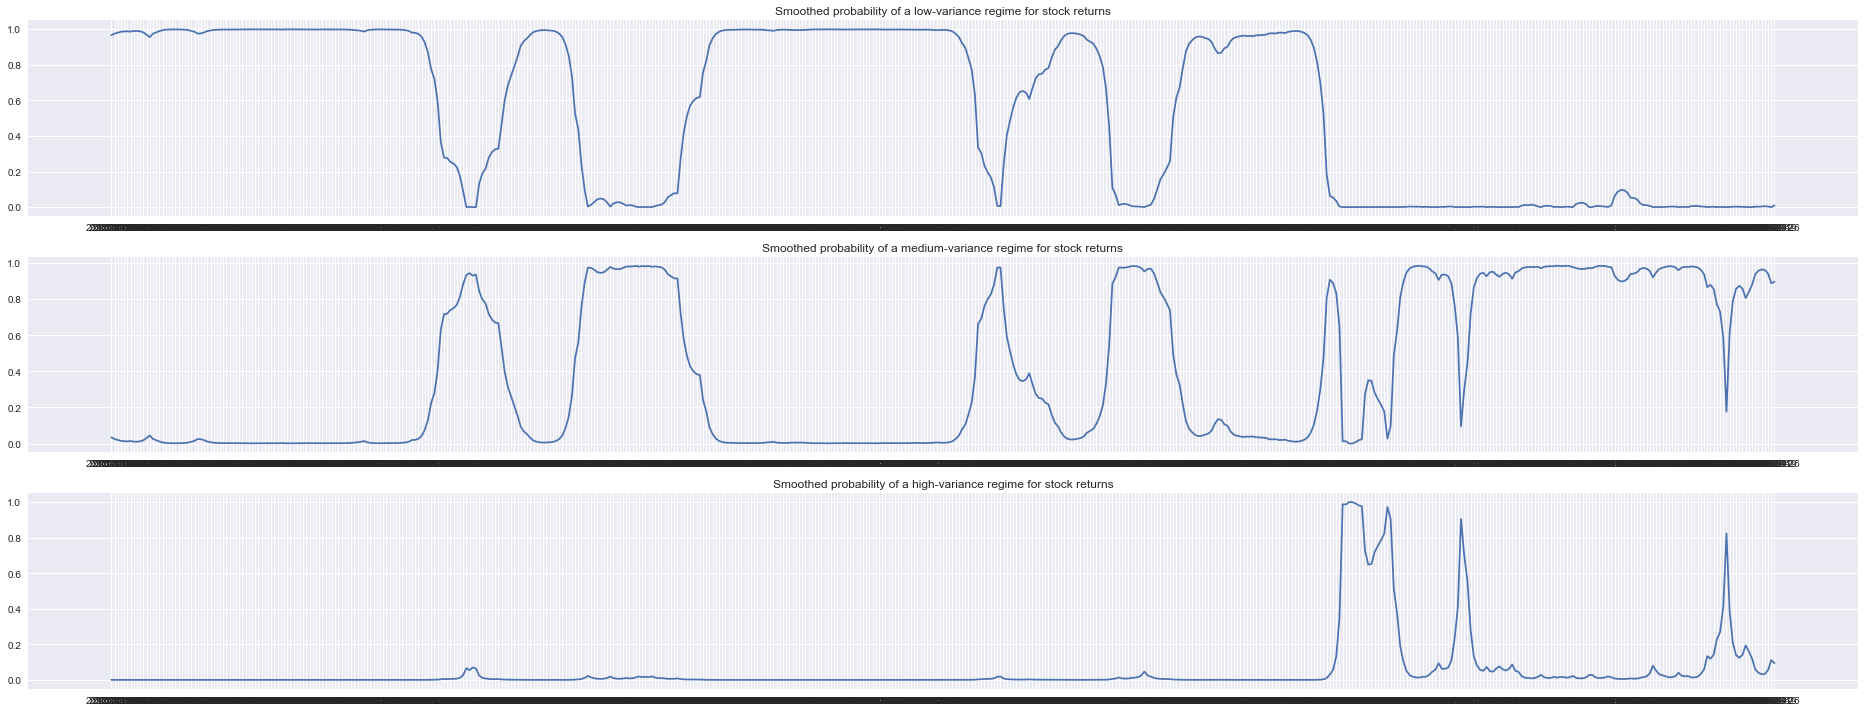

In [83]:
mod_kns = sm.tsa.MarkovRegression(combined_rets_df['XLE'].dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

fig, axes = plt.subplots(3, figsize=(26,10))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()

C:\Users\krish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


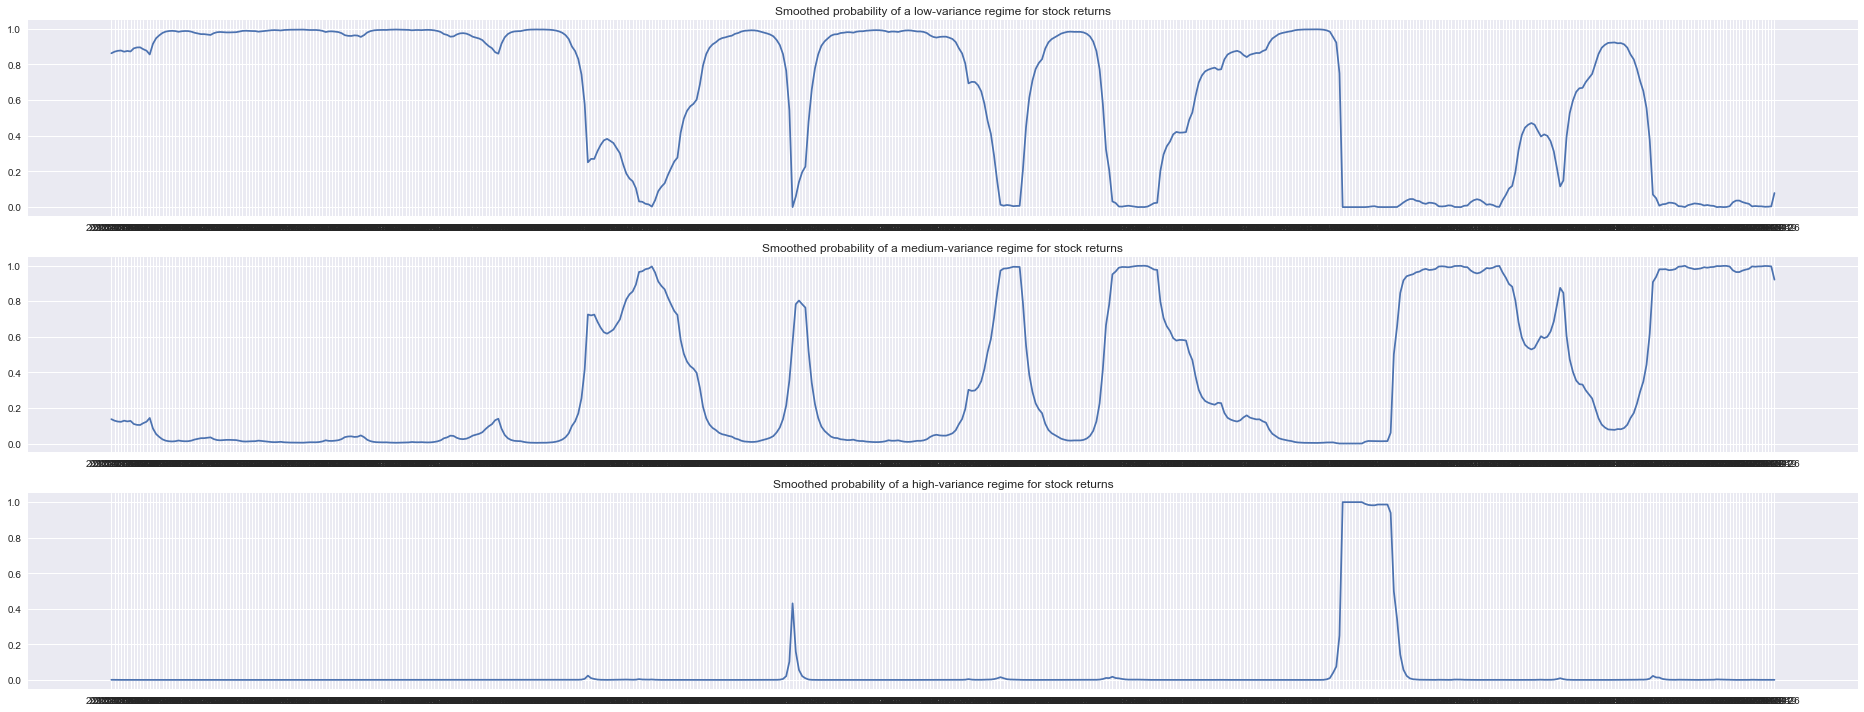

In [84]:
mod_kns = sm.tsa.MarkovRegression(combined_rets_df['XLF'].dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

fig, axes = plt.subplots(3, figsize=(26,10))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()

#### Correlation Matrix of prices

In [85]:
combined_prices_df.corr()

,SPY,VNQ,XLE,XLF
SPY,1.000000,0.95966,-0.033180,0.973104
VNQ,0.959660,1.00000,0.005160,0.955630
XLE,-0.033180,0.00516,1.000000,0.066417
XLF,0.973104,0.95563,0.066417,1.000000


## APPENDIX
some extra code which may be useful for experiments are kept here, Not to use in thesis writing now.

In [97]:
from fredapi import Fred
# FRED API key
fred_key = "0e42125b8d25e5d7a6b4f26132eb7b1e";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);
# Retrieve data from FRED API

fed_effective_rates_df = pd.DataFrame(fred.get_series('FEDFUNDS'));

In [98]:
fed_effective_rates_df.head()

,0
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


After discussion with Kenneth Abott:
    
    1. Working with weekly data,
    2. Test for statistical distributions
    3. Do different tests including ADF
    4. Check first order serial autocorrelation
    5. Plotting graphs, correlation matrices,
    6. Check regime shift, 
    7. Basic statistical analysis from dispersion (skewness, kurtosis). 

#### Resampling

In [ ]:
#TBD

#### Gathering data from Fred for Indicators purpose

In [ ]:
#TBD

### Data Display
#### Plotting for Outliers

In [ ]:
# TBD
# Boxplot
# Correlation heat map

##### Cluster correlation analysis

In [ ]:
# TBD
# cluster correlation matrix
# Scatter plot
# Time series plot
# Density plot


#### Calculating Daily Returns

In [ ]:
# TBD

In [ ]:
# PCA Analsis
# Extreme value tracing
# Modelling Data
## QQ Plot normalization
# Jorgue -Berra Test
# QQ Plot normalization 

# Gaussian F-test
# Normalization test
# 

## Model - fitting
# Copula
# Gaussian Copula
# Normal distribution
# Non Gaussian Copula
# Model Vine Copula
# 

## Regime Tests
#  Get data 
# CADF model function
# mean reverting relationship
# 